In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Cleaned_LA_Dataset.csv', parse_dates=['DATE OCC'], dayfirst=True)
data = data[data['DATE OCC'].dt.year <= 2023]
# Set 'DATE OCC' as the index
data.set_index('DATE OCC', inplace=True)

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Print the columns of the data
print(data.columns)

Index(['Date Rptd', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON'],
      dtype='object')


In [3]:
#Print the some instances of data fot DATE OCC column
print(data.index)

DatetimeIndex(['2020-01-04', '2020-01-04', '2020-01-11', '2020-01-23',
               '2020-01-27', '2020-01-28', '2020-01-28', '2020-01-30',
               '2020-01-27', '2020-01-31',
               ...
               '2023-12-15', '2023-12-15', '2023-12-17', '2023-12-22',
               '2023-12-28', '2023-12-22', '2023-12-17', '2023-12-28',
               '2023-10-09', '2023-12-20'],
              dtype='datetime64[ns]', name='DATE OCC', length=870330, freq=None)


In [4]:
print(data.tail())

                      Date Rptd  TIME OCC  AREA    AREA NAME  Rpt Dist No  \
DATE OCC                                                                    
2023-12-22  02-01-2024 00:00:00      2045     5       Harbor          585   
2023-12-17  11-01-2024 00:00:00      1313    11    Northeast         1124   
2023-12-28  31-01-2024 00:00:00      1000    16     Foothill         1663   
2023-10-09  12-02-2024 00:00:00      1620    10  West Valley         1089   
2023-12-20  19-02-2024 00:00:00      1800    19      Mission         1981   

            Part 1-2  Crm Cd                                      Crm Cd Desc  \
DATE OCC                                                                        
2023-12-22         1     420  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)   
2023-12-17         1     440               THEFT PLAIN - PETTY ($950 & UNDER)   
2023-12-28         2     354                                THEFT OF IDENTITY   
2023-10-09         2     354                           

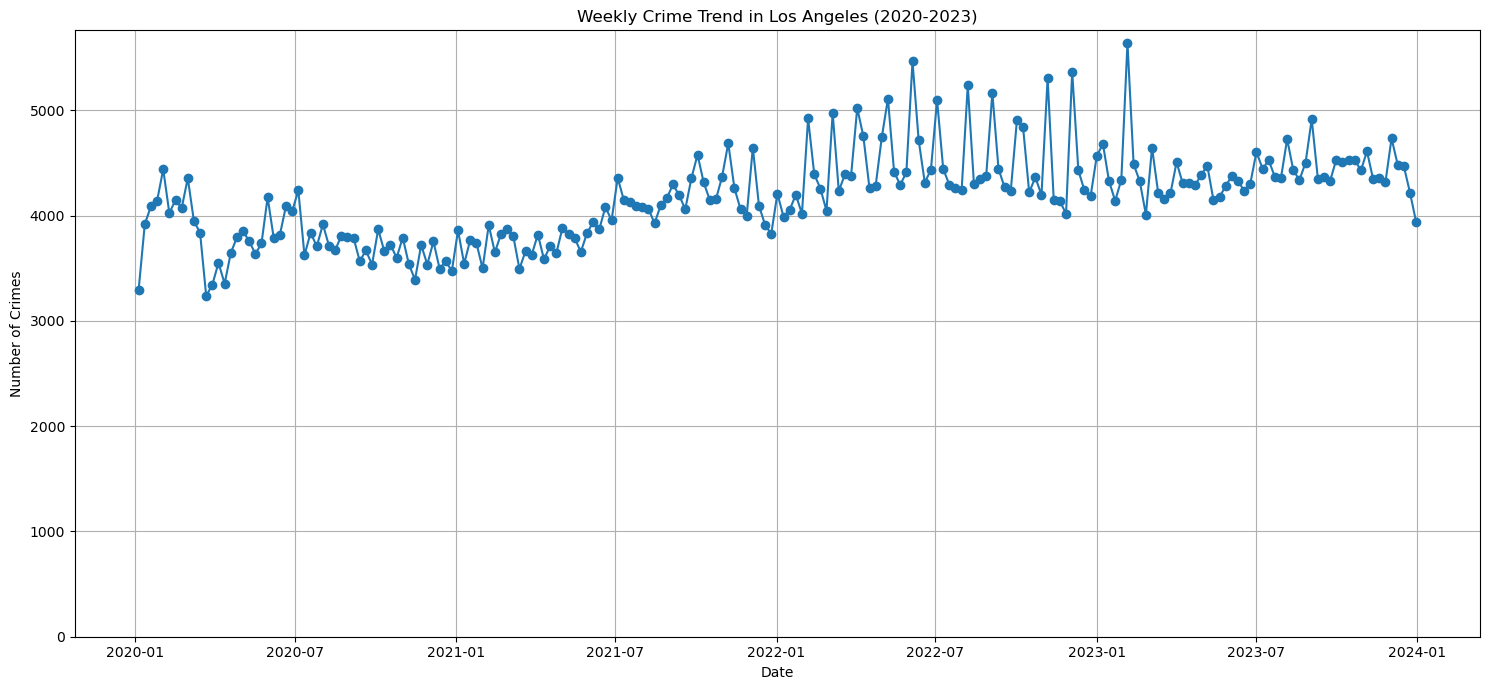

In [5]:
# Aggregate crime counts per week
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')

# Rename columns for consistency
weekly_crime.rename(columns={'DATE OCC': 'Date', 'Crime_Count': 'Number_of_Crimes'}, inplace=True)

# Plot the time series
plt.figure(figsize=(15, 7))
plt.plot(weekly_crime['Date'], weekly_crime['Number_of_Crimes'], marker='o', linestyle='-')
plt.title('Weekly Crime Trend in Los Angeles (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.ylim(bottom=0)  # Ensure y-axis starts at zero
plt.tight_layout()
plt.show()

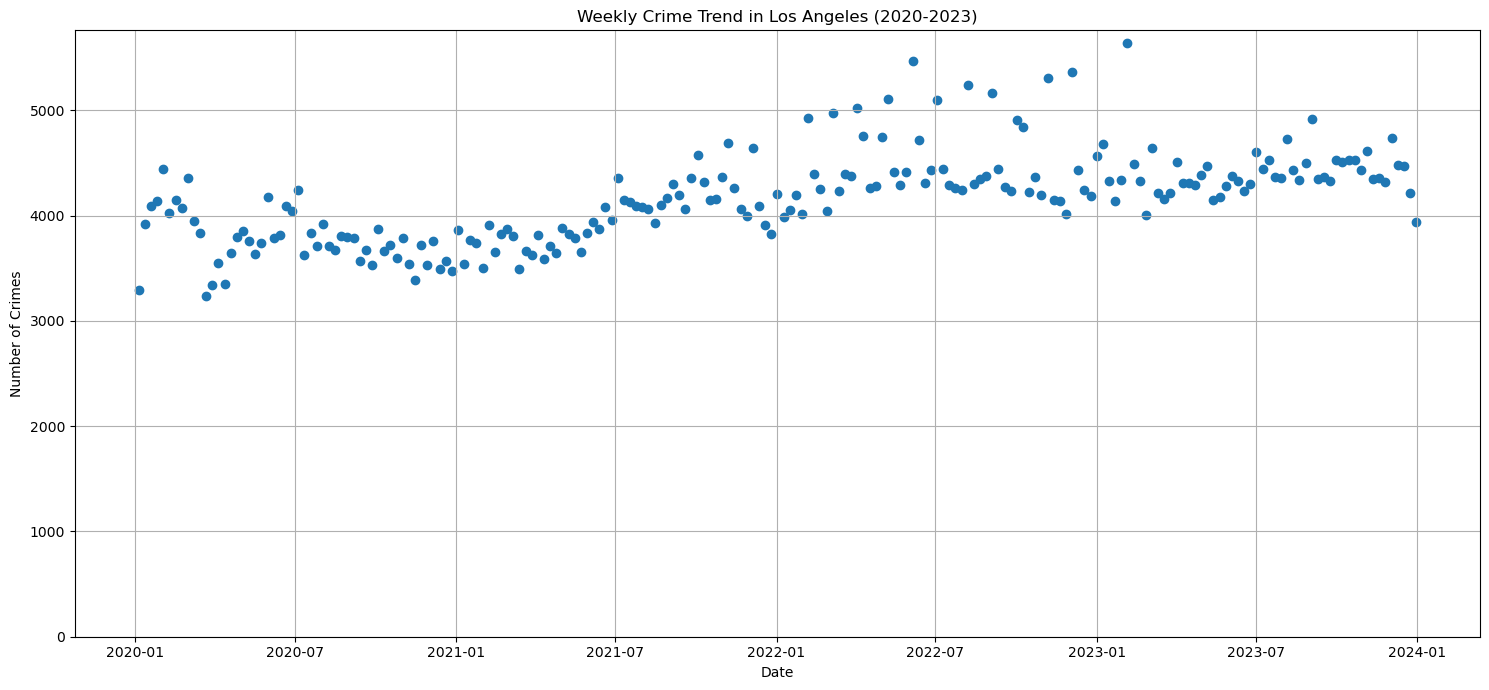

In [6]:
# Aggregate crime counts per week
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')

# Rename columns for consistency
weekly_crime.rename(columns={'DATE OCC': 'Date', 'Crime_Count': 'Number_of_Crimes'}, inplace=True)

# Plot the time series
plt.figure(figsize=(15, 7))
plt.scatter(weekly_crime['Date'], weekly_crime['Number_of_Crimes'], marker='o', linestyle='-')
plt.title('Weekly Crime Trend in Los Angeles (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.ylim(bottom=0)  # Ensure y-axis starts at zero
plt.tight_layout()
plt.show()

05:29:56 - cmdstanpy - INFO - Chain [1] start processing
05:29:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


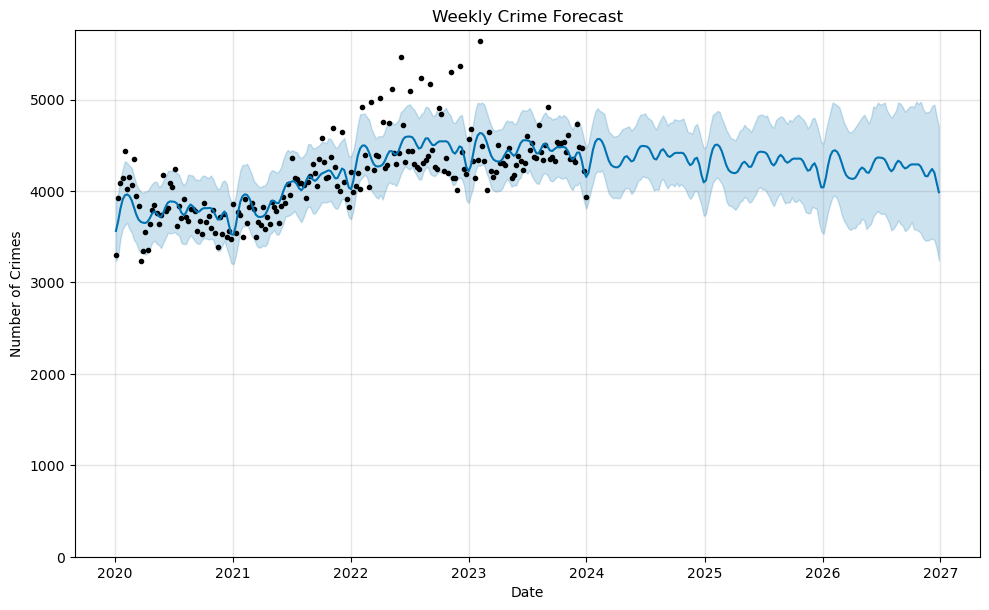

In [7]:
# Weekly Forecast
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')
weekly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the model
model_weekly = Prophet()

model_weekly.fit(weekly_crime)

# Create future dataframe for 3 years (156 weeks)
future_weekly = model_weekly.make_future_dataframe(periods=156, freq='W')

# Forecast future crime trends
forecast_weekly = model_weekly.predict(future_weekly)

# Set negative forecasts to zero
forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Plot the forecast with adjusted y-axis
fig = model_weekly.plot(forecast_weekly)
plt.title('Weekly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_33052\2979486649.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime = data.resample('M').size().reset_index(name='Crime_Count')
05:29:57 - cmdstanpy - INFO - Chain [1] start processing
05:29:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning: The

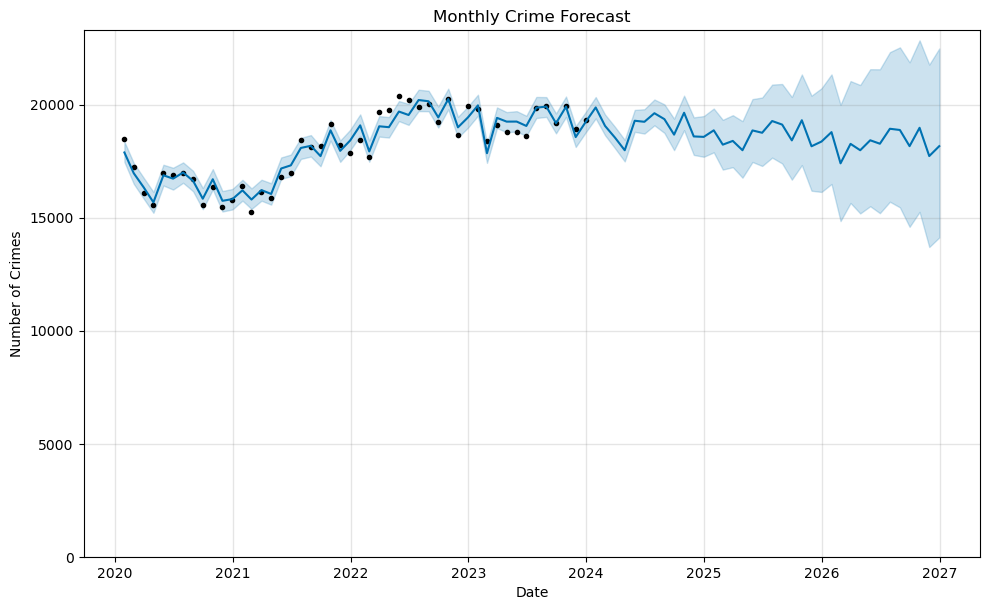

In [8]:
# Monthly Forecast
monthly_crime = data.resample('M').size().reset_index(name='Crime_Count')
monthly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the model
model_monthly = Prophet()

model_monthly.fit(monthly_crime)

# Create future dataframe for 3 years (36 months)
future_monthly = model_monthly.make_future_dataframe(periods=36, freq='M')

# Forecast future crime trends
forecast_monthly = model_monthly.predict(future_monthly)

# Set negative forecasts to zero
forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Plot the forecast with adjusted y-axis
fig = model_monthly.plot(forecast_monthly)
plt.title('Monthly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_33052\1966473376.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_crime = data.resample('Y').size().reset_index(name='Crime_Count')
05:29:58 - cmdstanpy - INFO - Chain [1] start processing
05:29:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning: The 

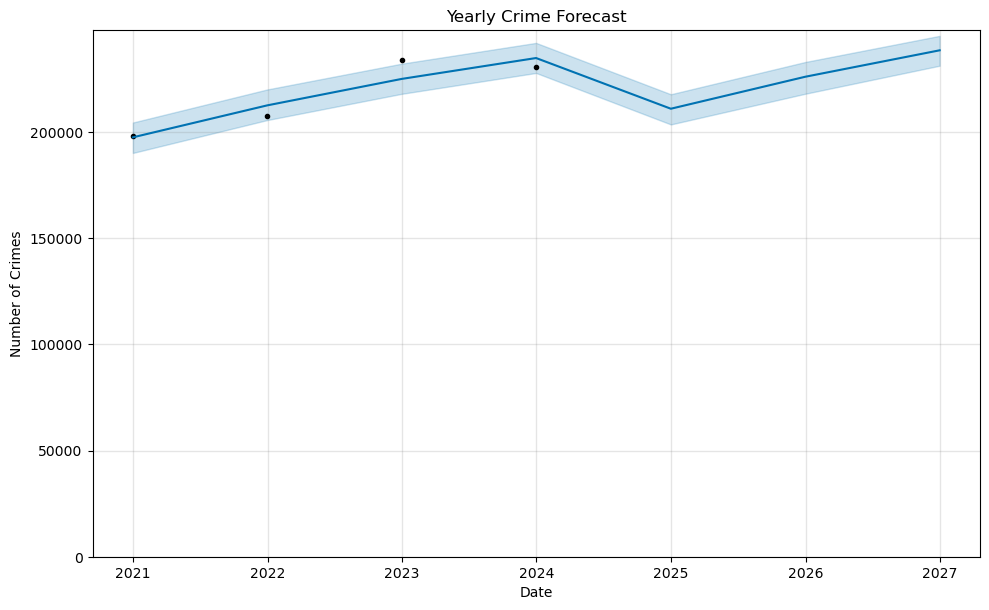

In [9]:
# Yearly Forecast
yearly_crime = data.resample('Y').size().reset_index(name='Crime_Count')
yearly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the model
model_yearly = Prophet()

model_yearly.fit(yearly_crime)

# Create future dataframe for 3 years
future_yearly = model_yearly.make_future_dataframe(periods=3, freq='Y')

# Forecast future crime trends
forecast_yearly = model_yearly.predict(future_yearly)

# Set negative forecasts to zero
forecast_yearly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_yearly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Plot the forecast with adjusted y-axis
fig = model_yearly.plot(forecast_yearly)
plt.title('Yearly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()